In Problem Framing (Step-0), we defined the problem as a binary classification task and split the dataset into training & test sets. 
Ideally, the next step is data-collection in the Data-Science Lifecycle, but since we already have the dataset we proceed with the next step i.e. EDA.

We'll use only the training set for further steps: EDA, Data Preprocessing, Training & Finetuning. Test set will only be used to evaluate the final model selection at the very end, to prevent overfitting on it.

In this notebook, we'll be exploring training dataset using statistics, visualizations & hypothesis testing. These will performed on the raw data without any modifications like handling missing values & outliers, feature engineering etc.

# Load the training set

In [2]:
# Imports
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List, Literal

In [3]:
# Read the CSV file
TRAIN_DATA_PATH = "../data/train.csv"
train_df = pd.read_csv(TRAIN_DATA_PATH, index_col=0)
train_df.reset_index(drop=True, inplace=True) # Reset the index after shuffled dataset split
train_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status
0,18500.0,60 months,10.65,340.24,B,B2,CNMI Government,10+ years,OWN,40000.0,...,0.0,8.0,0.1,27.0,f,INDIVIDUAL,NaN,0.0,"7530 Barnes Flat Apt. 584\r\nWhitetown, NV 30723",Fully Paid
1,13175.0,36 months,16.55,466.78,D,D2,customer service / account rep,4 years,RENT,30000.0,...,1.0,1046.0,15.8,8.0,f,INDIVIDUAL,0.0,0.0,"443 Rice Views Apt. 282\r\nNorth Jameshaven, A...",Fully Paid
2,35000.0,60 months,17.86,886.11,D,D5,Branch Manager,10+ years,MORTGAGE,80000.0,...,0.0,20239.0,57.5,36.0,w,INDIVIDUAL,2.0,0.0,3857 Christopher Courts Suite 005\r\nEast Chri...,Charged Off
3,20400.0,36 months,12.12,678.75,B,B3,California Dept of transportation,10+ years,RENT,65000.0,...,0.0,12717.0,49.4,31.0,f,INDIVIDUAL,0.0,0.0,"840 Parks Viaduct\r\nLake Brittanyside, MT 48052",Fully Paid
4,35000.0,60 months,17.57,880.61,D,D4,Air Traffic Control Specialist,10+ years,RENT,200000.0,...,0.0,14572.0,63.1,8.0,w,INDIVIDUAL,0.0,0.0,"042 Jamie Grove\r\nEast Maryshire, LA 70466",Charged Off


# Exploratory Data Analysis

## Basic exploration

These steps include:
* Understanding what each columns/feature in the dataset represents
* Checking the shape of the dataset
* Check for duplicates & missing values 
* Identify the numeric, categorical, time-series etc features
* Descriptive statistics for the columns/features 

The columns/features represent the following information:

* `loan_amnt` : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
* `term` : The number of payments on the loan. Values are in months and can be either 36 or 60.
* `int_rate` : Interest Rate on the loan
* `installment` : The monthly payment owed by the borrower if the loan is approved.
* `grade` : LoanTap assigned loan grade
* `sub_grade` : LoanTap assigned loan subgrade
* `emp_title` :The job title supplied by the Borrower when applying for the loan.
* `emp_length` : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
* `home_ownership` : The home ownership status provided by the borrower during registration or obtained from the credit report.
* `annual_inc` : The self-reported annual income provided by the borrower during registration.
* `verification_status` : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
* `issue_d` : The month which the loan was funded
* `loan_status` : Current status of the loan - Target Variable
* `purpose` : A category provided by the borrower for the loan request.
* `title` : The loan title provided by the borrower
* `dti` : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
* `earliest_cr_line` :The month the borrower's earliest reported credit line was opened
* `open_acc` : The number of open credit lines in the borrower's credit file.
* `pub_rec` : Number of derogatory public records
* `revol_bal` : Total credit revolving balance
* `revol_util` : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
* `total_acc` : The total number of credit lines currently in the borrower's credit file
* `initial_list_status` : The initial listing status of the loan. Possible values are – W, F
* `application_type` : Indicates whether the loan is an individual application or a joint application with two co-borrowers
* `mort_acc` : Number of mortgage accounts.
* `pub_rec_bankruptcies` : Number of public record bankruptcies
* `Address`: Address of the individual

In [4]:
# Check the shape of dataset
train_df.shape

(316824, 27)

In [5]:
# Check feature data-types & non-null samples
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316824 entries, 0 to 316823
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             316824 non-null  float64
 1   term                  316824 non-null  object 
 2   int_rate              316824 non-null  float64
 3   installment           316824 non-null  float64
 4   grade                 316824 non-null  object 
 5   sub_grade             316824 non-null  object 
 6   emp_title             298538 non-null  object 
 7   emp_length            302283 non-null  object 
 8   home_ownership        316824 non-null  object 
 9   annual_inc            316824 non-null  float64
 10  verification_status   316824 non-null  object 
 11  issue_d               316824 non-null  object 
 12  purpose               316824 non-null  object 
 13  title                 315425 non-null  object 
 14  dti                   316824 non-null  float64
 15  

In [6]:
# Check for duplicates
train_df.duplicated().sum()

np.int64(0)

In [7]:
# Check for missing values column/feature-wise
train_df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               18286
emp_length              14541
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
purpose                     0
title                    1399
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                220
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                30207
pub_rec_bankruptcies      437
address                     0
loan_status                 0
dtype: int64

In [8]:
# How many records have atleast 1 null value
train_df.isna().any(axis=1).sum()

np.int64(48024)

In [9]:
# Descriptive statistics for numerical features (for raw data without modifications)
train_df.describe(include=["float"])

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,316824.000000,316824.000000,316824.000000,3.168240e+05,316824.000000,316824.000000,316824.000000,3.168240e+05,316604.000000,316824.000000,286617.000000,316387.000000
mean,14121.259043,13.644967,432.119451,7.428983e+04,17.347766,11.316441,0.178762,1.585613e+04,53.812772,25.428683,1.813357,0.121841
std,8368.044418,4.475089,251.099213,6.356200e+04,8.624197,5.140178,0.535504,2.067522e+04,24.457802,11.888294,2.147043,0.357005
min,500.000000,5.320000,16.080000,6.000000e+02,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.027000e+03,35.900000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.470000,6.400000e+04,16.910000,10.000000,0.000000,1.119100e+04,54.850000,24.000000,1.000000,0.000000
75%,20000.000000,16.550000,568.420000,9.000000e+04,22.980000,14.000000,0.000000,1.962400e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,1622.000000,76.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [10]:
# Descriptive statistics for categorical features (for raw data without modifications)
train_df.describe(include=["object"])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,purpose,title,earliest_cr_line,initial_list_status,application_type,address,loan_status
count,316824,316824,316824,298538,302283,316824,316824,316824,316824,315425,316824,316824,316824,316824,316824
unique,2,7,35,143252,11,6,3,114,14,40304,672,2,3,315235,2
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USNS Johnson\r\nFPO AE 05113,Fully Paid
freq,241633,92627,21376,3557,101015,158794,111573,11838,187571,121886,2415,190613,316267,8,254686


In [11]:
# Extra information about categorical features
cat_feat = [feat for feat in train_df.columns if train_df[feat].dtype=="object"]
for feat in cat_feat:
    print(f"Column/Feature: {feat}")
    print(f"Number of unique categories: {train_df[feat].nunique()}")
    print(f"Value counts: {train_df[feat].value_counts()}")
    print("-"*100)

Column/Feature: term
Number of unique categories: 2
Value counts: term
36 months    241633
60 months     75191
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Column/Feature: grade
Number of unique categories: 7
Value counts: grade
B    92627
C    84797
A    51332
D    50880
E    25329
F     9402
G     2457
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Column/Feature: sub_grade
Number of unique categories: 35
Value counts: sub_grade
B3    21376
B4    20408
C1    18906
C2    18109
B2    17939
B5    17578
C3    16993
C4    16217
B1    15326
A5    14826
C5    14572
D1    12874
A4    12643
D2    11155
D3     9735
D4     9304
A3     8495
D5     7812
A1     7732
A2     7636
E1     6354
E2     5931
E3     5036
E4     4309
E5     3699
F1     2804
F2     2189
F3     1830
F4     1462
F5     1117
G1      845
G2      614
G3      439
G4     

### Basic insights from basic exploration:

* There are ~316K samples & 27 features in the dataset. Out of the 27 features, 12 features are numerical & 15 are categorical in the raw data. There are few features that are numerical & date-related in nature but stored as strings (e.g. term, emp_length, issue_d etc.), thus counted as categorical. Hence, feature engineering is required.
* There are no duplicate records/samples in the training dataset.
* There are missing values present in 6 columns/features in the dataset namely: __emp_title, emp_length, title, revol_util, mort_acc, pub_rec_bankruptcies__
* From descriptive stats:
    - Numerical features:
        * Most of the following features are skewed in their distribution.
        * ****loan_amt****: Range => 500-40000, Mean = 14000.
        * ****int_rate****: Range => ~5-40%, Mean = 13.6%. This feature insanely high max interest rate. This might be an indicator for defaulter samples
        * ****installment****: Range => ~16-1500, Mean = 432.
        * ****annual_inc****: Range => 600-8.7M, Mean = 74K. It seems there are definitely outliers in this feature (might be due to data-entry), otherwise a person earning 8.7M annually applying for loan-amount <= 40K, doesn't make sense.
        * ****dti****: Range => 0-1622%, Mean = 17.34%. This feature is definitely skewed as the debt-income ratio of ~1600 doesn't look right. Value >43% is generally considered [high](https://loantap.in/blog/what-is-debt-to-income-ratio/) and can also be an indicator of defaulter samples.
        * ****open_acc****: Range => 0-76, Mean ~ 11. The max number of open-accounts of 76 looks unusual.
        * ****pub_rec****: Range => 0-86, Mean ~ 0. Interestingly, only few people have public derogatory records as all the quartiles (25, 50 & 75) are 0, with an outlier of 86.
        * ****revol_bal****: Range => 0-1.74M, Mean ~ 16K. This feature is skewed, due to very high max revolving balance value compared to mean & median (11K). The max value is unusual and might be from multiple credit lines maybe, or can be an outlier
        * ****revol_util****: Range => 0-892%, Mean ~ 54%. The max values of 892% shouldn't be possible, but might be the case when considering multiple credit lines or again can be an outlier
        * ****total_acc****: Range => 2-151, Mean ~ 25. The max number of credit lines of the borrower i.e. 151 seems like an outlier, even the mean is a higher value, indicating unusually high credit-history.
        * ****mort_acc****: Range => 0-34, Mean ~ 2. The max value of 34 being way higher than 75th percentile of 3 indicates presence of an outlier.
        * ****pub_rec_bankruptcies****: Range => 0-8, Mean ~ 0. Though these values look believable, only a few people have reported them as all the quartiles are 0.
    - Categorical features:
        * ****term****: There are only terms (months) of loan repayment i.e. 36 or 60. This should be converted to a numerical feature.
        * ****grade****: There are 7 unique grades namely: A-G, with B being the most-commonly assigned grade to the loans.
        * ****sub****-grades: Each grade is further divided into 5 sub-grades each resulting in 35 sub-grades e.g. A1-A5. Also, B3 is the most commonly occurring sub-grade in the dataset
        * ****emp_title****: Majority of the borrowers are Teachers by profession. Also, there are ~140K professions registered against the borrowers, indicating high cardinality (number of categories). This feature will need cleaning.
        * ****emp_length****: The year of experience of borrowers ranges from 0-10+ years, with most of them falling in 10+ years category.
        * ****home_ownership****: This features has 6 unique categories: Mortgage, Rent, Own, Other, None, Any. Majority of the borrowers have their home mortgaged. Also, the Other, None & Any categories can be clubbed into 1 due to less number of samples & it makes more sense.
        * ****verification_status****: This feature has 3 categories: Verified, Source verified & Not verified. Most of the borrowers have their income verified. The cardinality can be reduced here as well by combining the Verified & Source-verified categories into a single category
        * ****issue_d****: Majority of loans were issued in the year 2014, specifically the October month. Will need to check if there is a trend based on the time of the year. This feature can be converted to a numerical or date-time feature.
        * ****purpose****: Most of the borrowers take a loan for debt-consolidation followed by credit-card payment. Will need to check if this feature has any correlation with the number of open credit-lines of the borrower, revolving balance, debt-to-income ratio etc
        * ****title****: This feature contains the same information as `purpose` feature, but with more cardinality/categories. This content looks more like a comment from the borrower on the purpose of the loan. I think this feature can be ignored.
        * ****earliest_cr_line****: Majority of the Borrowers' credit lines start from the year 2000, while for some borrowers dating back to 1950's.
        * ****initial_list_status****: Most of the loans are assinged the status `f` followed by `w` (the only 2 categories). Upon research, I found that `f` & `w` represent fractional loan & whole loan respectively, where incase of fractional loan the entire loan amount is divided into smaller amount & funded by multiple investors whereas the whole loan is usually funded fully by an institutional investor. Although, I also found that this is an internal metric for the lending platforms and pertains less to the borrower, but still need to confirm with further analysis.
        * ****application_type****: Almost all the borrowers have applied for an Individual loan, with only ~500 samples for Joint & Direct-pay loans combined.
        * ****address****: Looking at this feature, one thing is pretty evident that this dataset doesn't come from `LoanTap` 😅, as its an Indian company and the addresses corresponds to places in USA. From this, the currency can be inferred as Dollars. Not all pincodes are valid, but the state code seem genuine (you can check it out [here](https://tools.usps.com/zip-code-lookup.htm))
        * ****loan_status****: This is the target feature with 2 categories: ***Fully Paid*** & ***Charged Off***, with majority of loans to have been fully paid

### Indirect inferences:

* Since, the `issue_d` exist for each loan, all the loans in the dataset were approved initially, but the repayment was incomplete for `Charged Off` samples. So, the model's objective is to identify the defaulters from responsible payer.

## Advanced Analysis

This includes:
* Univariate analysis
* Bivariate analysis (w.r.t target feature)
* Correlation analysis (for numerical features)
* Hypothesis testing (to validate different hypothesis)
* Outlier detection

### Univariate analysis

For univariate analysis, I'll be visualizing each column/feature as follows:
* Numerical features: Visualize their Histogram chart
* Categorical features: Visualize their Bar-chart
* Date-related features: Visualize their Bar-chart

In [12]:
# Univariate Visualization function
def univariate_viz(features: List, feature_type: Literal["numerical", "categorical", "date"]):
    num_feat = len(features)
    n_cols = 3
    n_rows = math.ceil(num_feat/3)
    plt.figure(figsize=(22, num_feat*1.5))
    for i in range(num_feat):
        ax = plt.subplot(n_rows, n_cols, i+1)
        feature_values = train_df[features[i]].dropna()
        
        # Numerical features
        if feature_type == "numerical":
            sns.histplot(feature_values, bins=200, ax=ax)
        # Categorical features
        elif feature_type == "categorical":
            sorted_categories = sorted(feature_values.unique())
            sns.countplot(x=feature_values, order=sorted_categories, ax=ax)
            plt.xticks(rotation=90)
        # Date features
        else:
            # Plot only the years for date features
            feature_values = pd.to_datetime(feature_values, format="mixed").dt.year
            sorted_categories = sorted(feature_values.unique())
            sns.countplot(x=feature_values, order=sorted_categories, ax=ax)
            plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()   

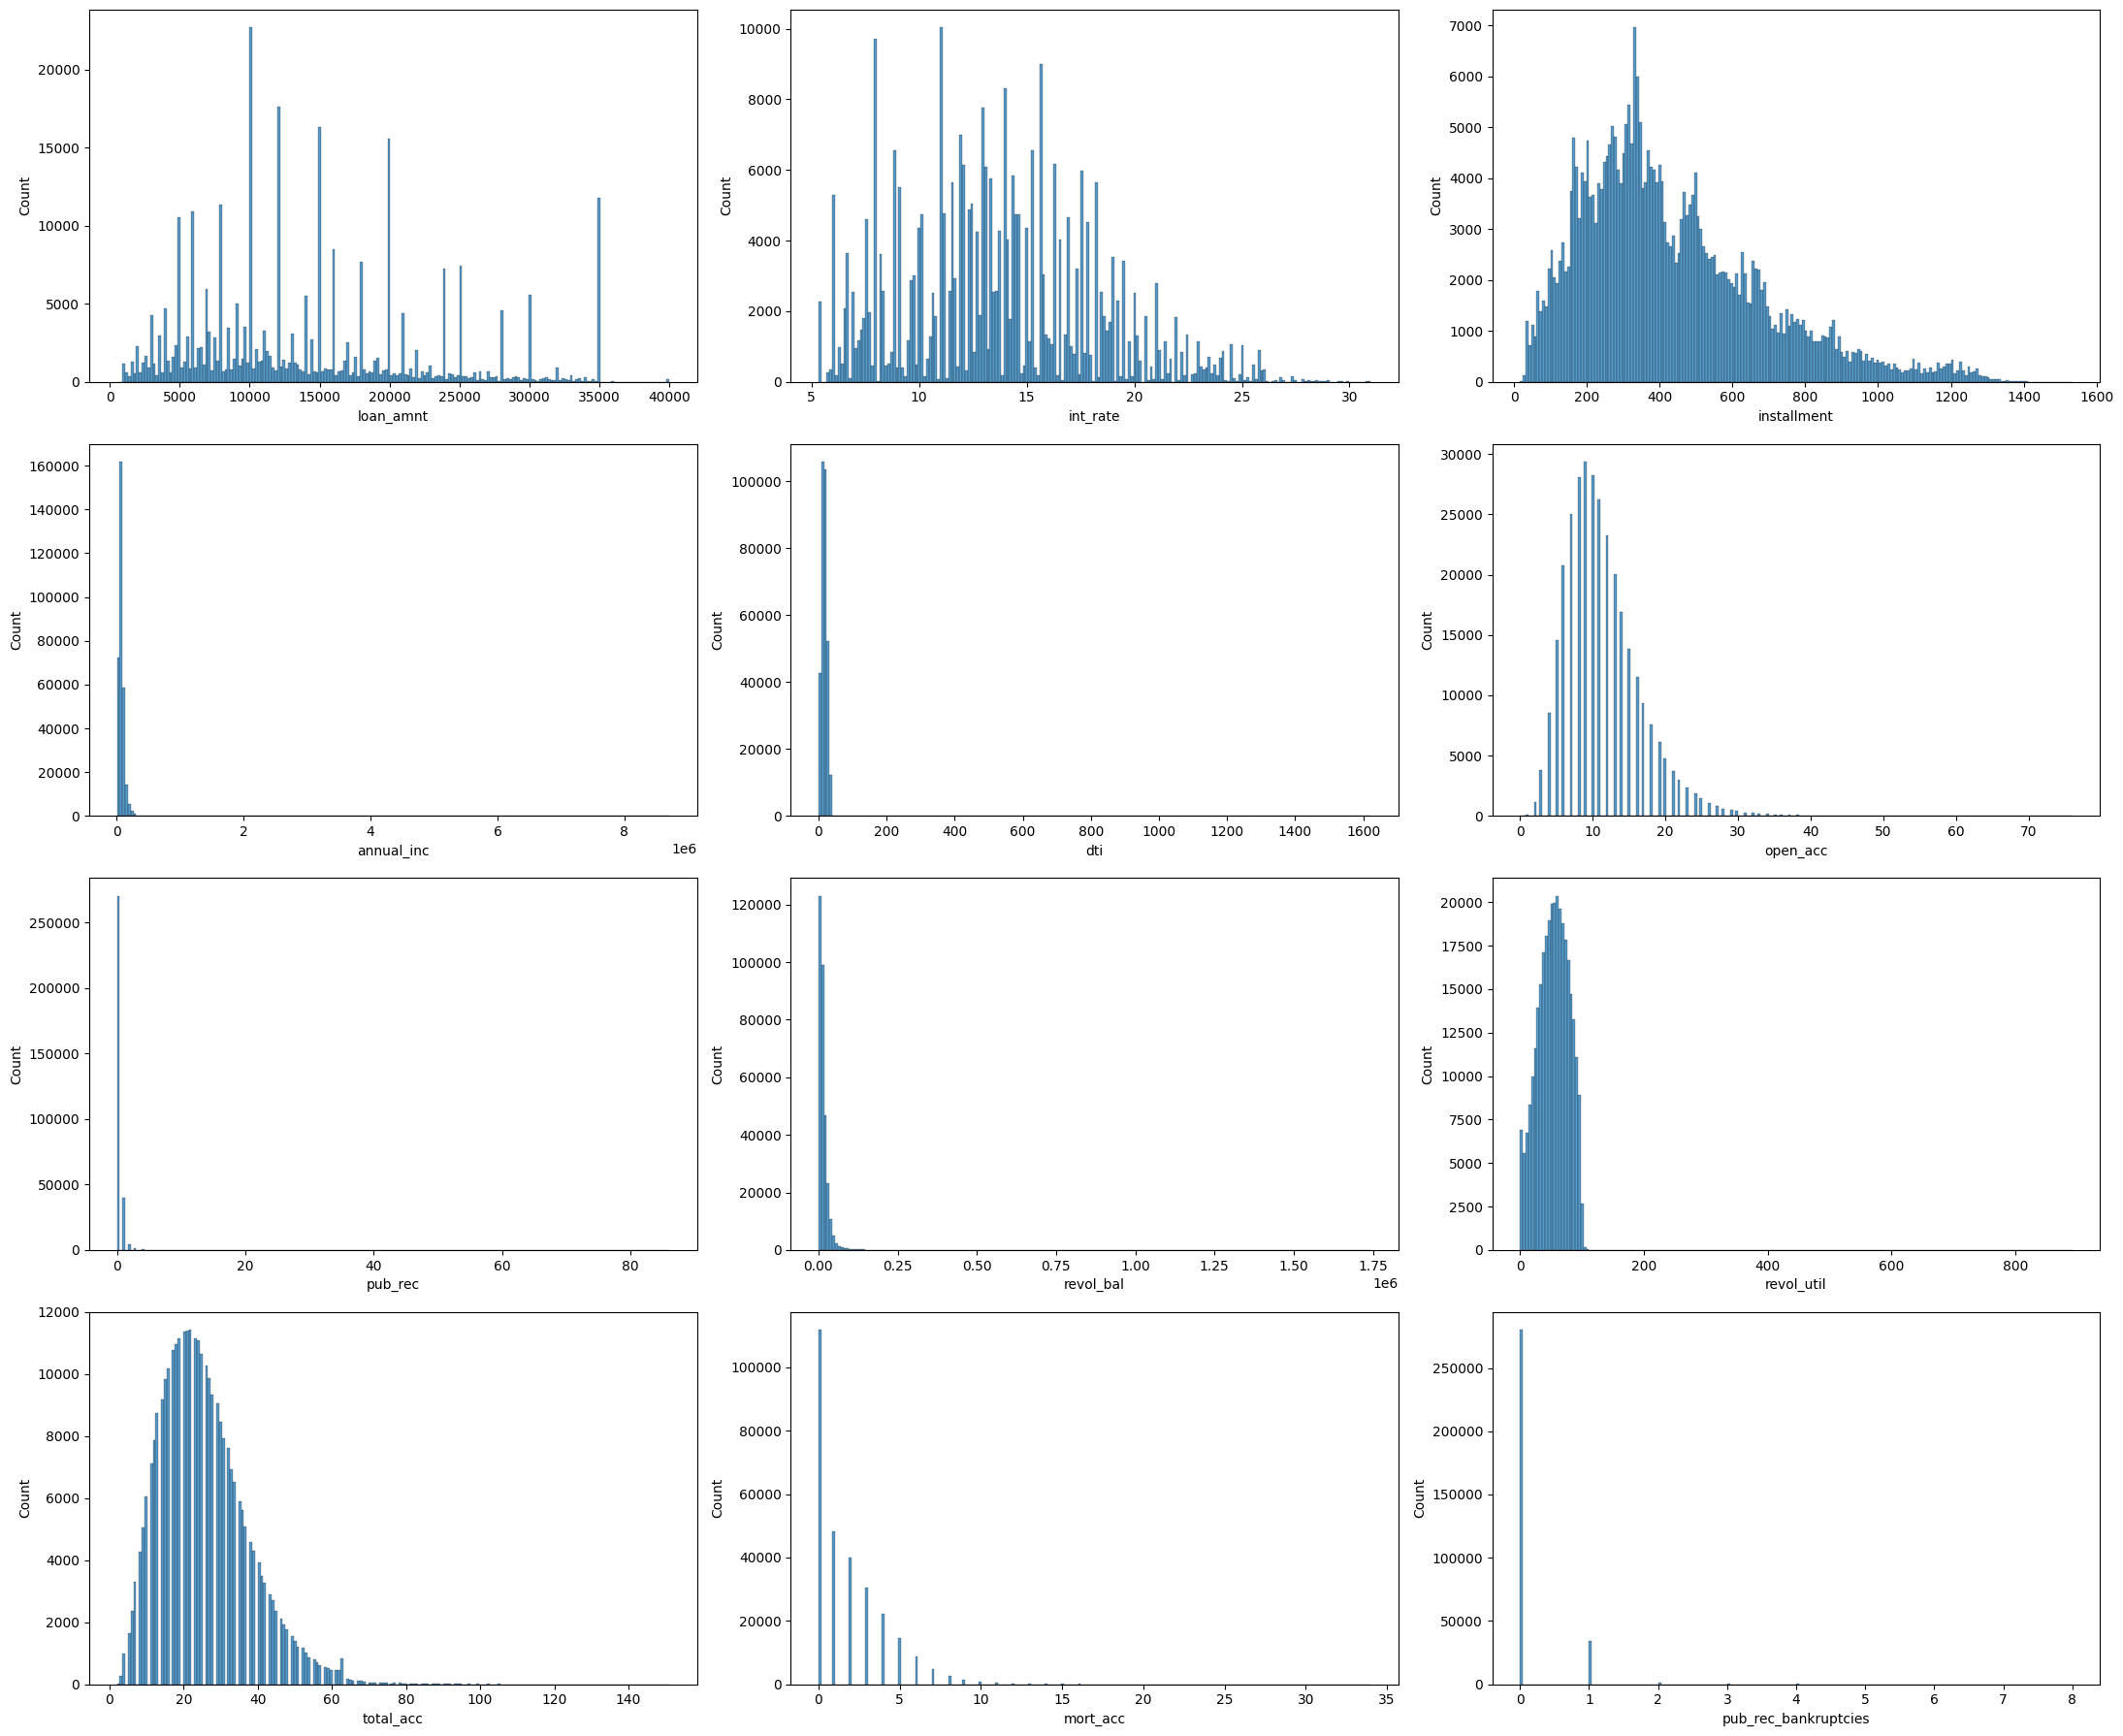

In [13]:
# Visualizing Numerical features
num_feat = [feat for feat in train_df.columns if train_df[feat].dtype=="float"]
univariate_viz(num_feat, feature_type="numerical")

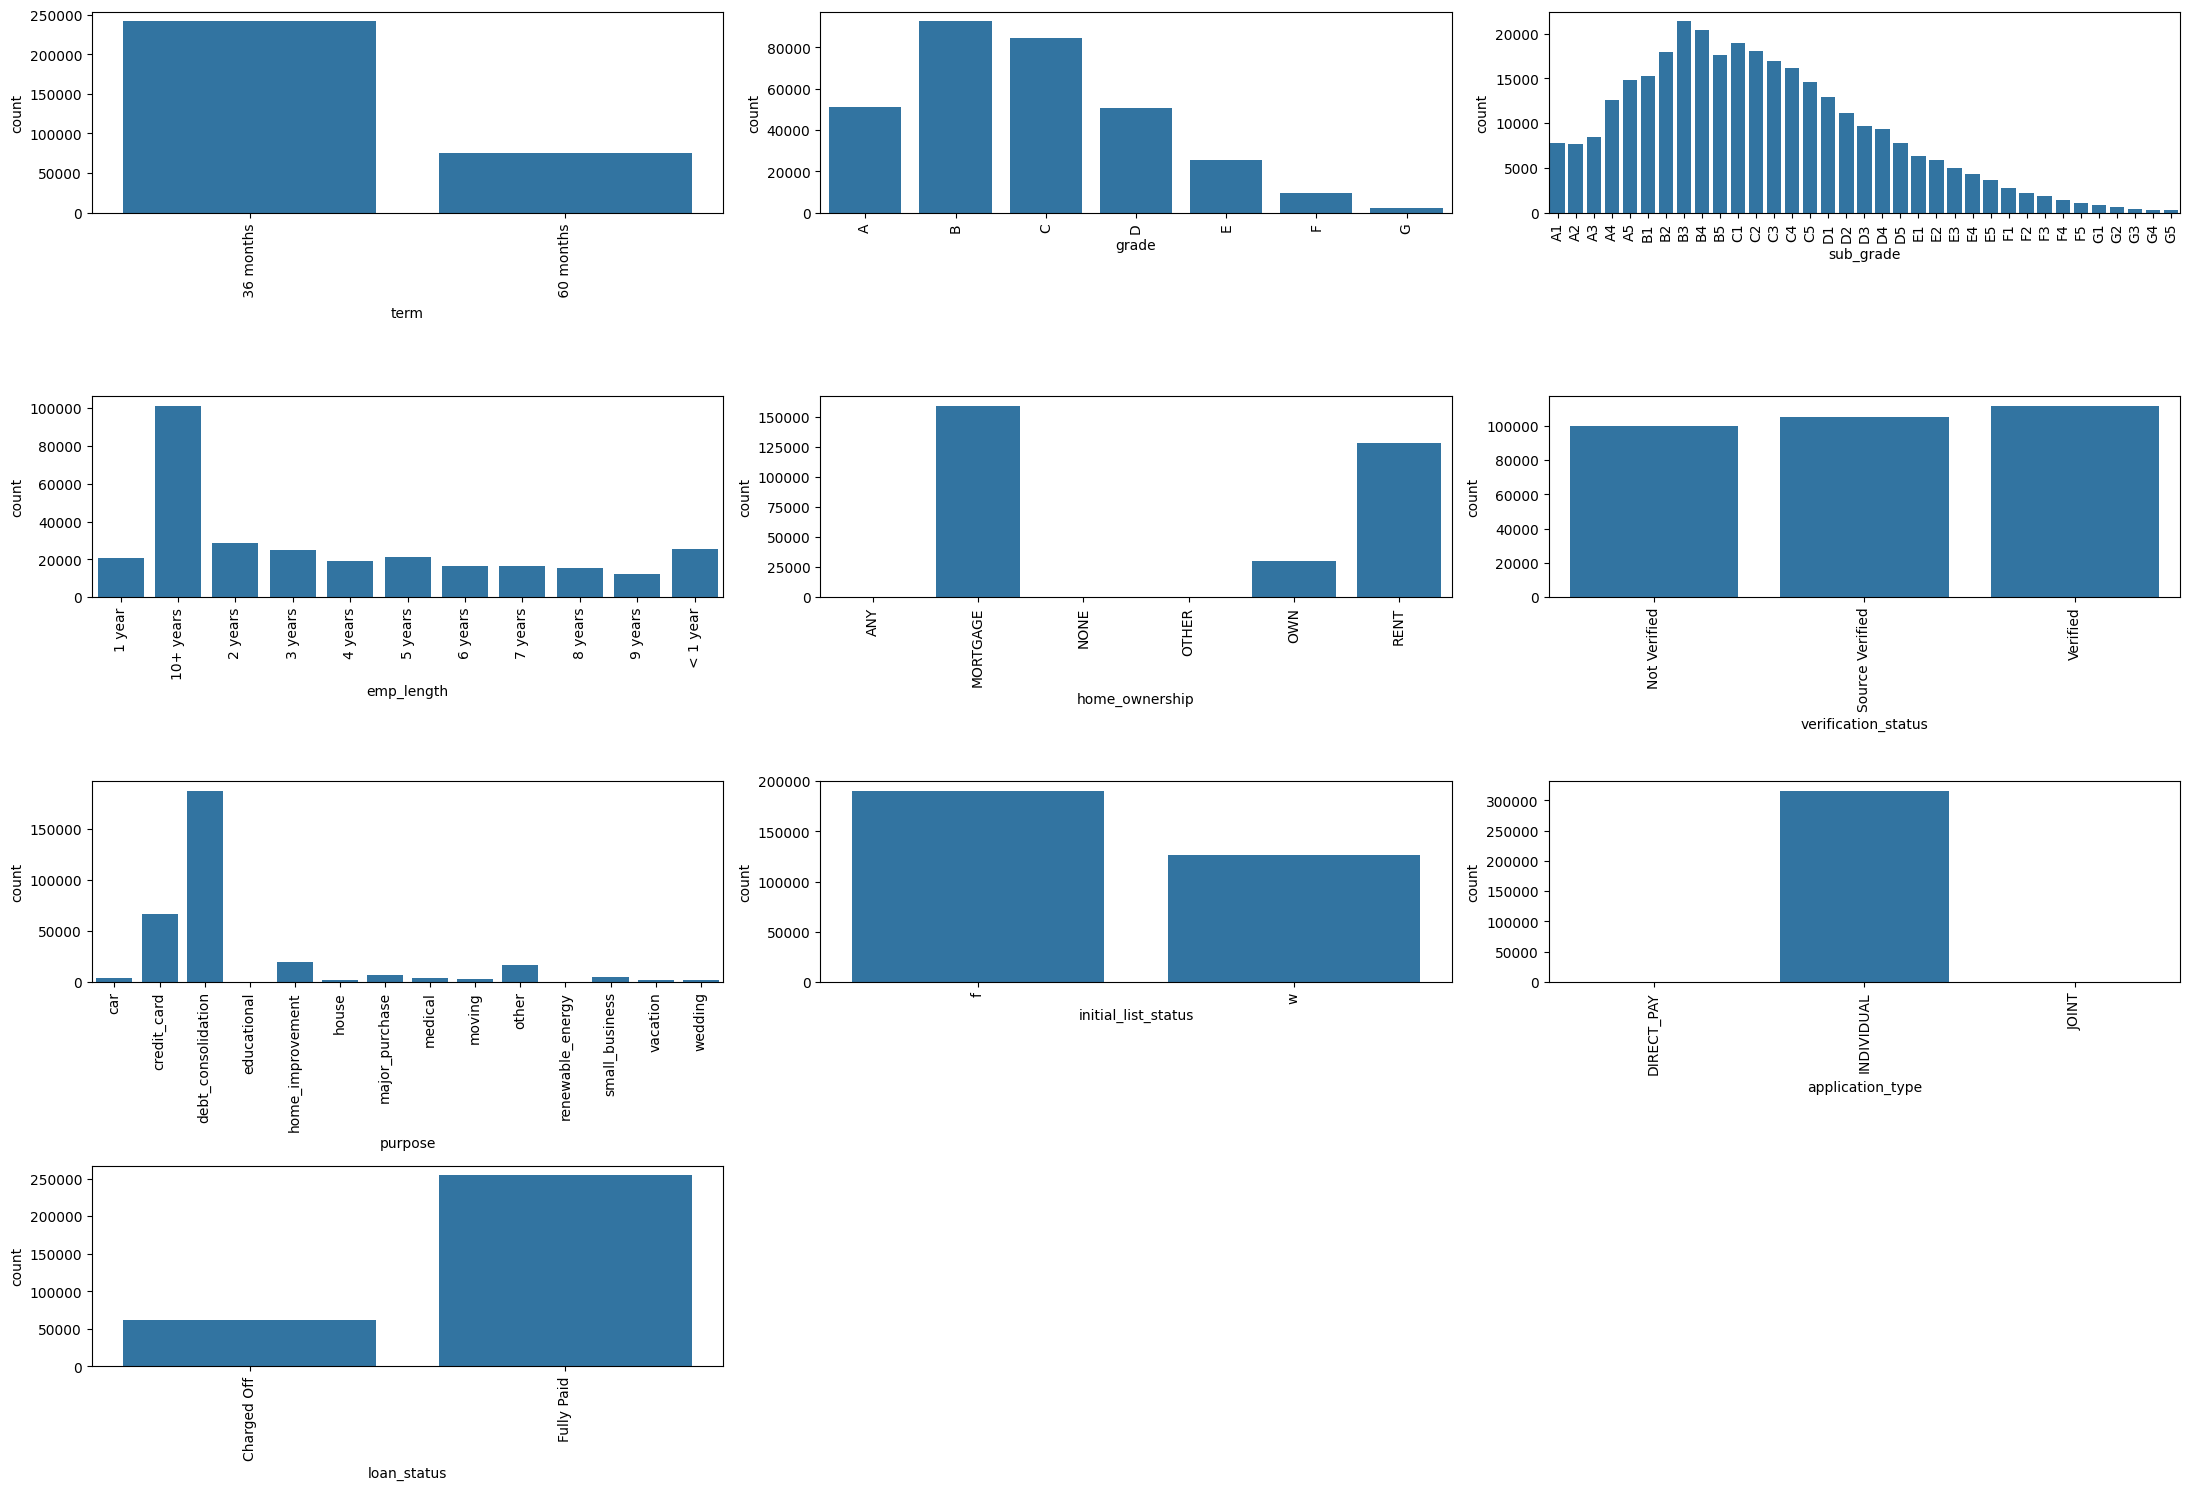

In [14]:
# Categorical features
cat_feat_viz = [feat for feat in cat_feat if feat not in {"emp_title", "title", "address"}] # Ignore features with high cardinality for visualization
cat_feat_viz = [feat for feat in cat_feat_viz if feat not in {"issue_d", "earliest_cr_line"}] # Remove the date related features
univariate_viz(cat_feat_viz, feature_type="categorical")

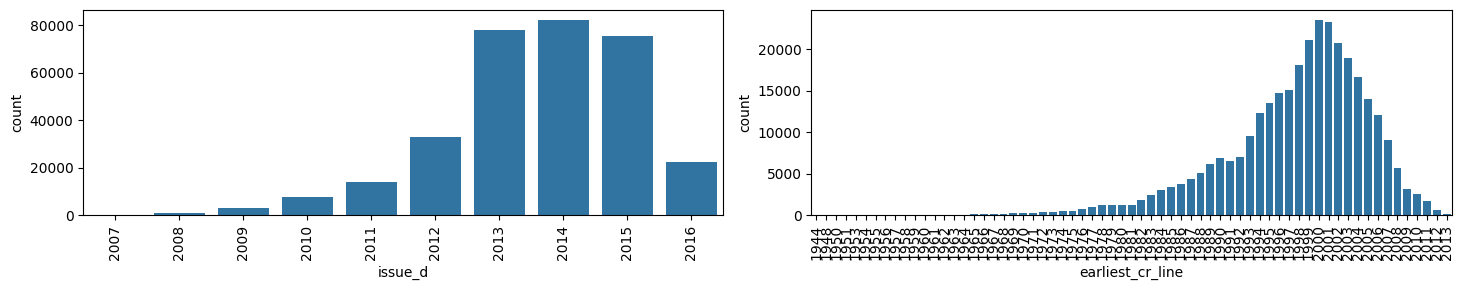

In [15]:
# Date-related features
date_feat = ["issue_d", "earliest_cr_line"]
univariate_viz(date_feat, feature_type="date")

### Bivariate analysis

For bivariate analysis, I'll be visualizing each column/feature w.r.t target feature as follows:
* Numerical features: Visualize their Histogram chart with target class labels
* Categorical features: Visualize their Bar-chart with target class label percentages
* Date-related features: Visualize their Bar-chart with target class label percentages

In [41]:
# Bivatiate Visualization function
def bivariate_viz(features: List, feature_type: Literal["numerical", "categorical", "date"], target_feat="loan_status"):
    num_feat = len(features)
    n_cols = 3
    n_rows = math.ceil(num_feat/n_cols)

    plt.figure(figsize=(22, 1.5*num_feat))    
    for i in range(num_feat):
        ax = plt.subplot(n_rows, n_cols, i+1)

        # Feature values without NaN
        na_idxs = train_df[features[i]].isna()
        feature_values = train_df.loc[~na_idxs, features[i]]
        target_values = train_df.loc[~na_idxs, target_feat]

        # Numerical features
        if feature_type=="numerical":
            sns.histplot(x=feature_values, bins=200, hue=target_values, ax=ax)
        # Categorical features
        elif feature_type=="categorical":
            sorted_categories = sorted(feature_values.unique())
            sns.countplot(x=feature_values, hue=target_values, order=sorted_categories, dodge=False, ax=ax)
            plt.xticks(rotation=90)
        # Date-related features
        else:
            # Plot only the years for date features
            feature_values = pd.to_datetime(feature_values, format="mixed").dt.year
            sorted_categories = sorted(feature_values.unique())
            sns.countplot(x=feature_values, hue=target_values, order=sorted_categories, hue_order=["Fully Paid", "Charged Off"], dodge=False, ax=ax)
            plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

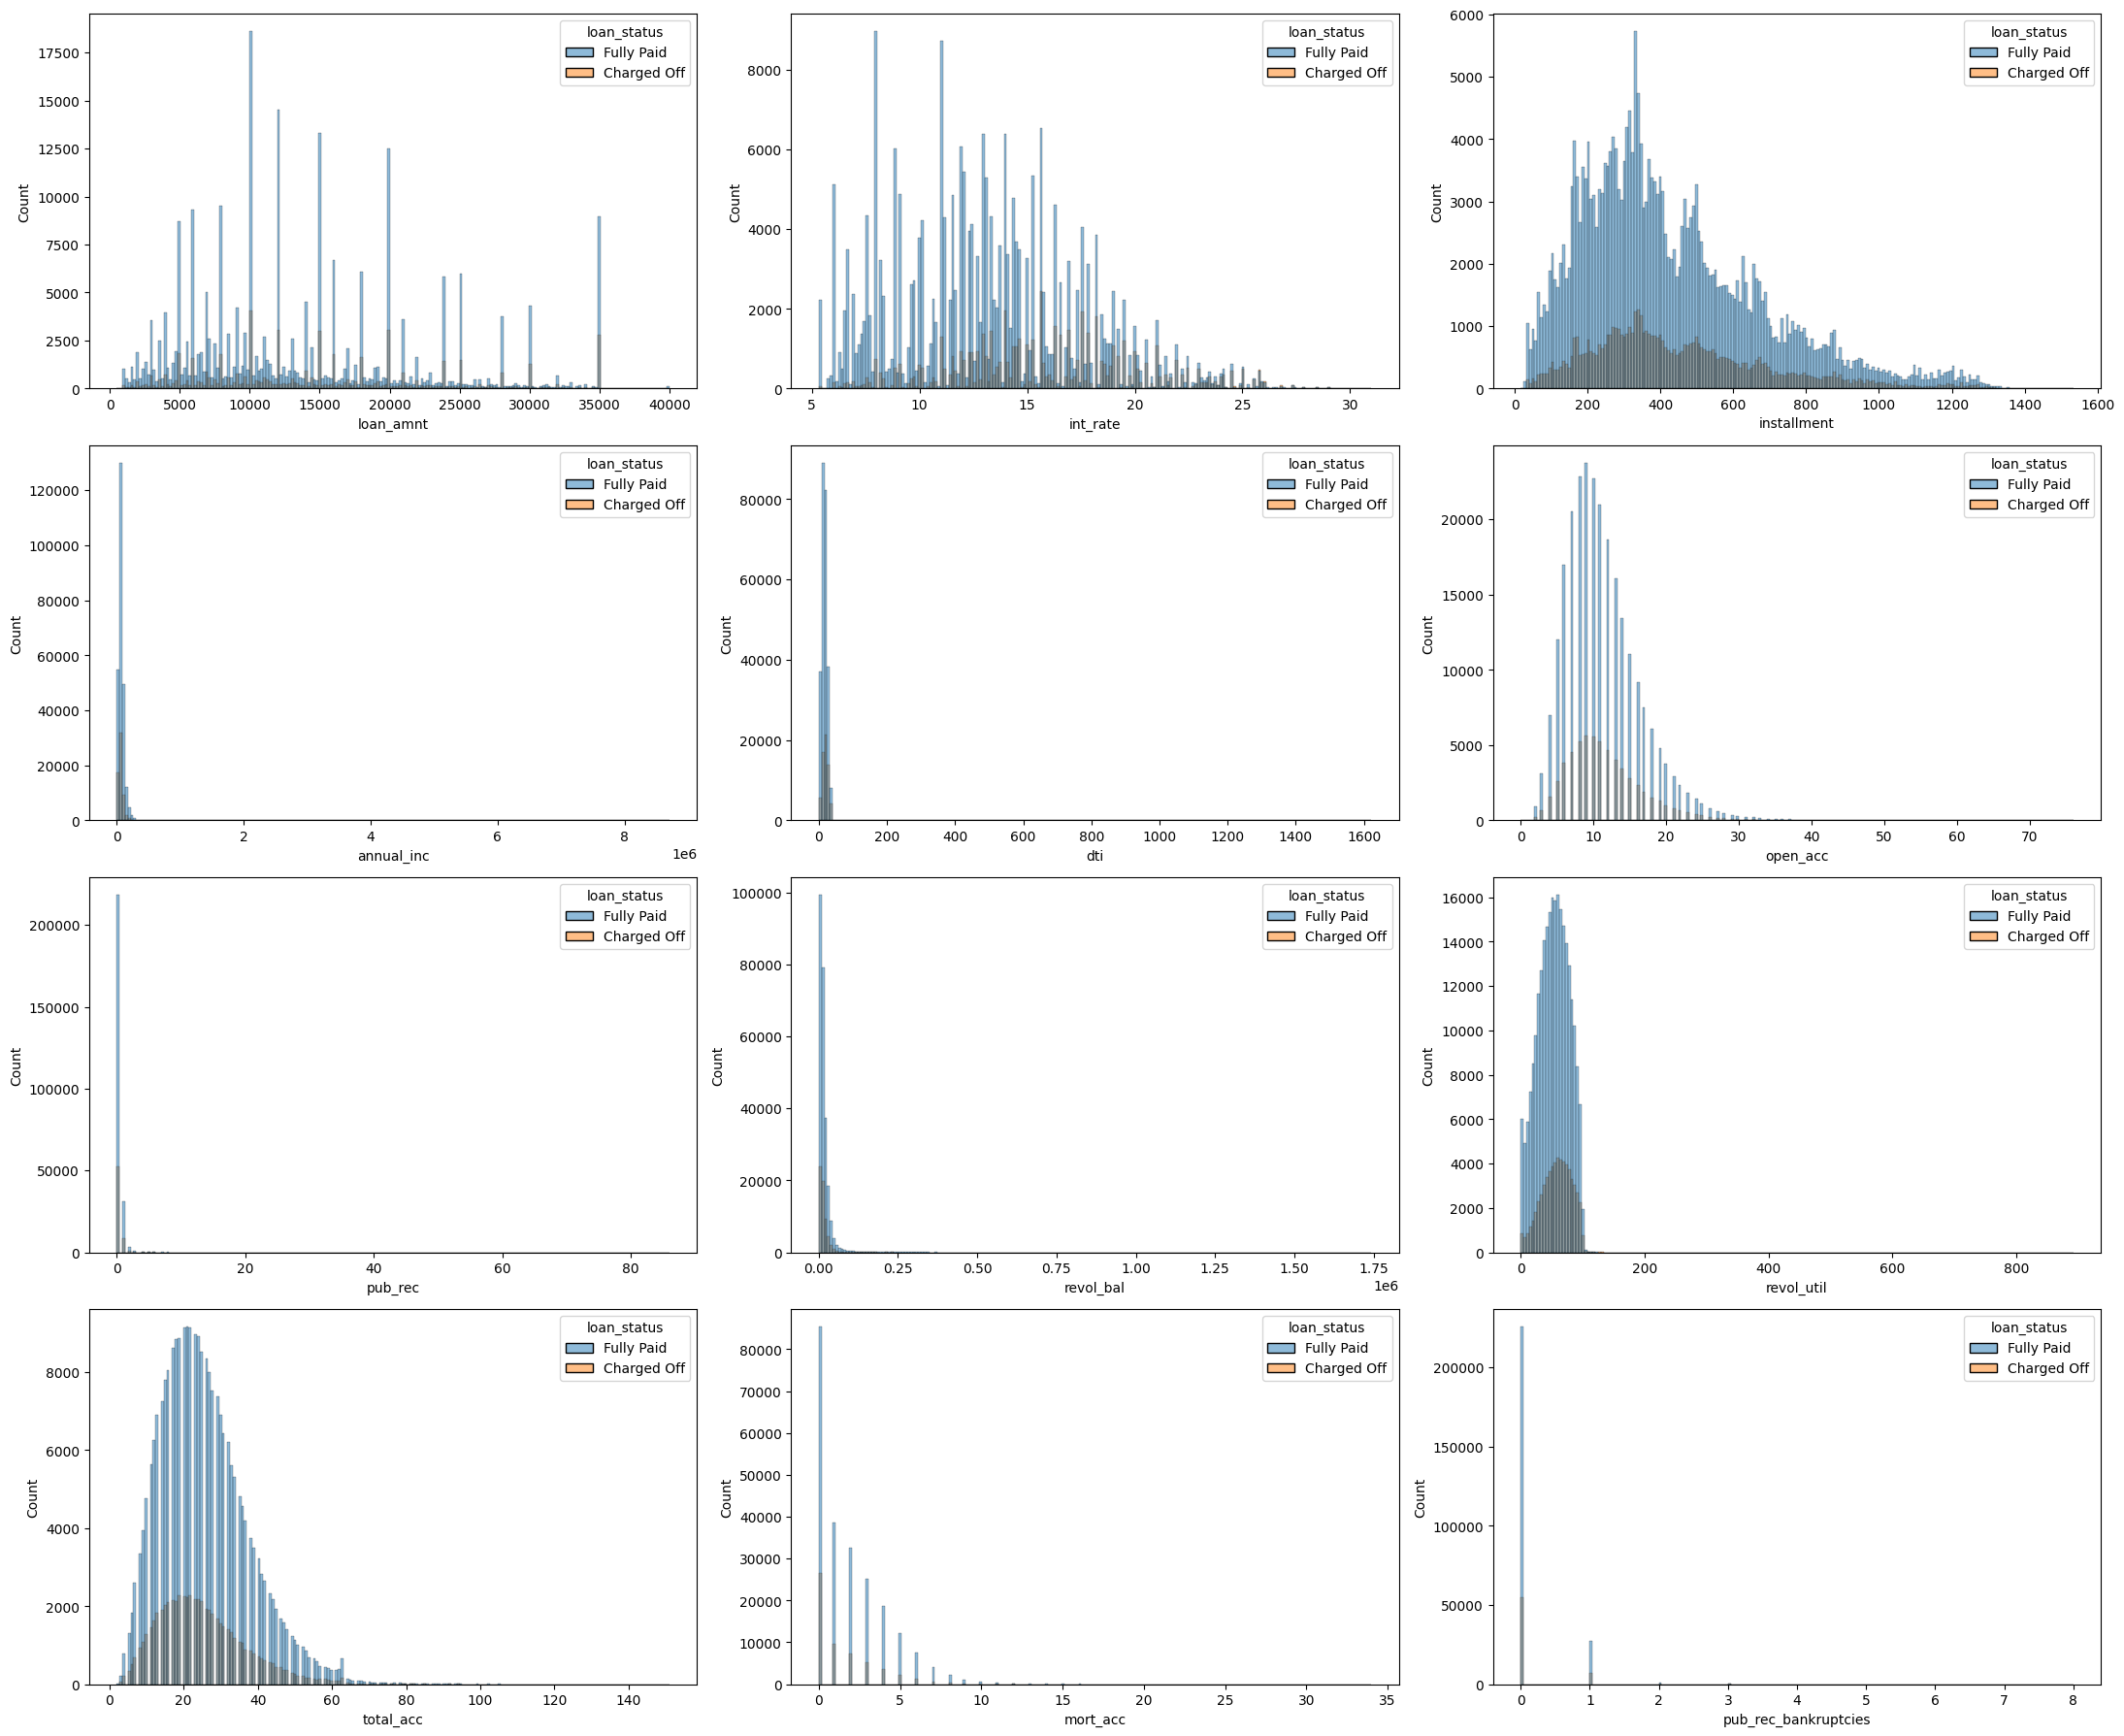

In [20]:
# Numerical features
bivariate_viz(num_feat, feature_type="numerical")

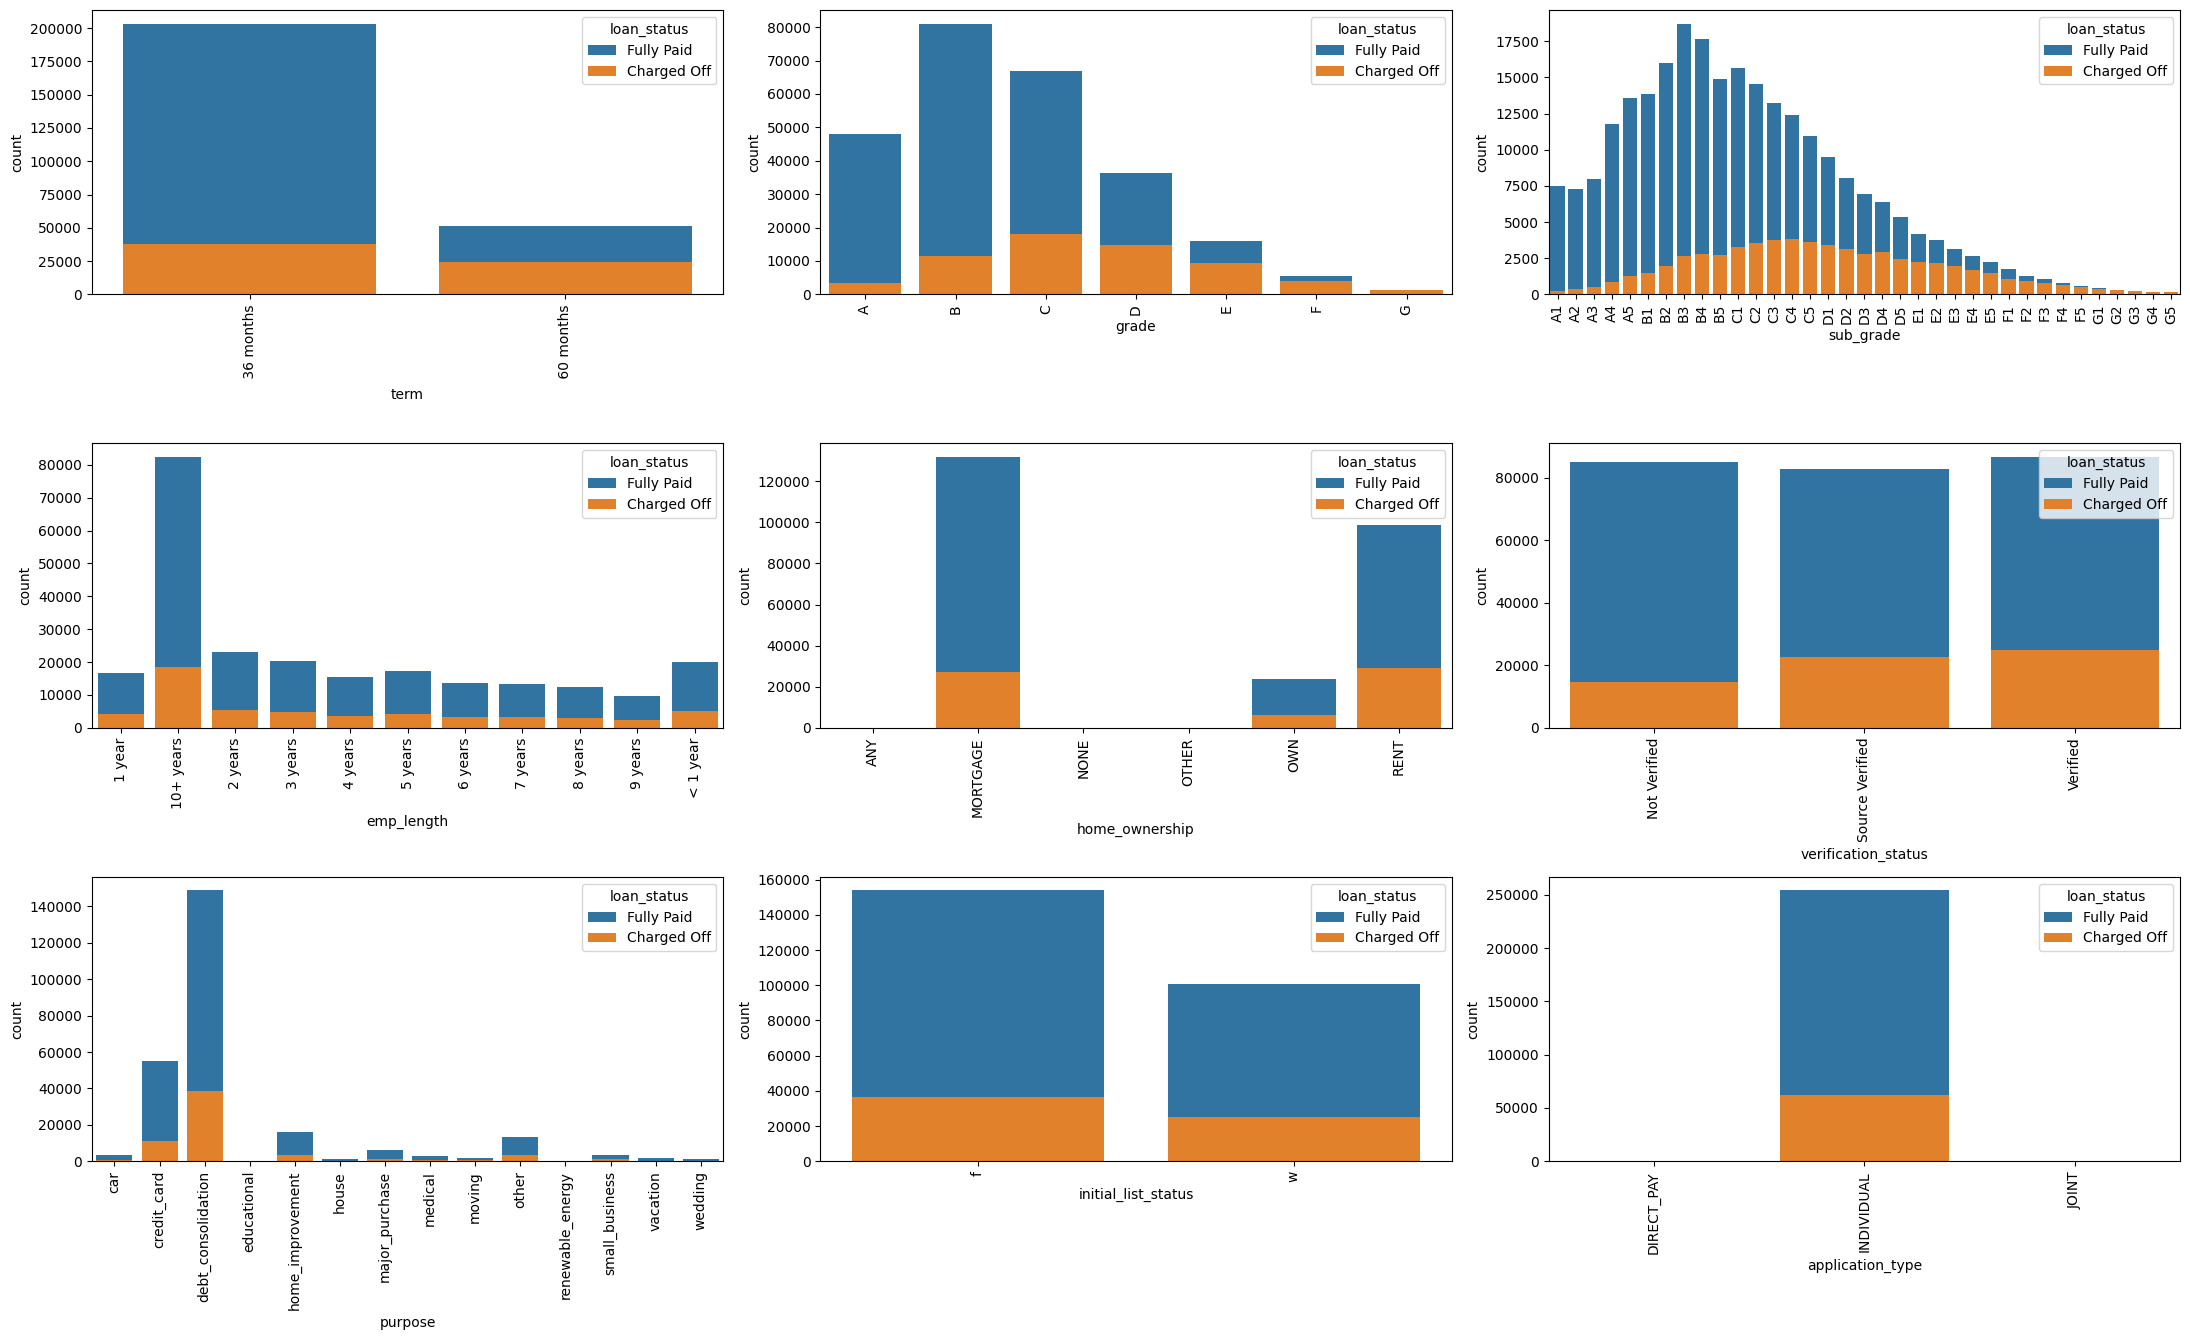

In [21]:
# Categorical features
cat_feat_viz.remove("loan_status")
bivariate_viz(cat_feat_viz, feature_type="categorical")

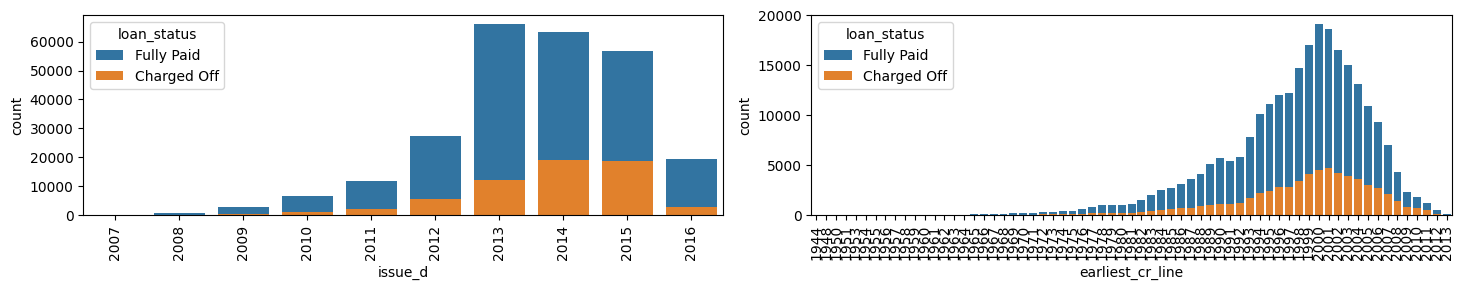

In [42]:
# Date-related features
bivariate_viz(date_feat, feature_type="date")

### Correlation analysis

I'll plot the correlations between numerical features in the dataset. This can help identify highly-correlated features, which introduces multi-collinearity and affects the model's predictions.

<Axes: >

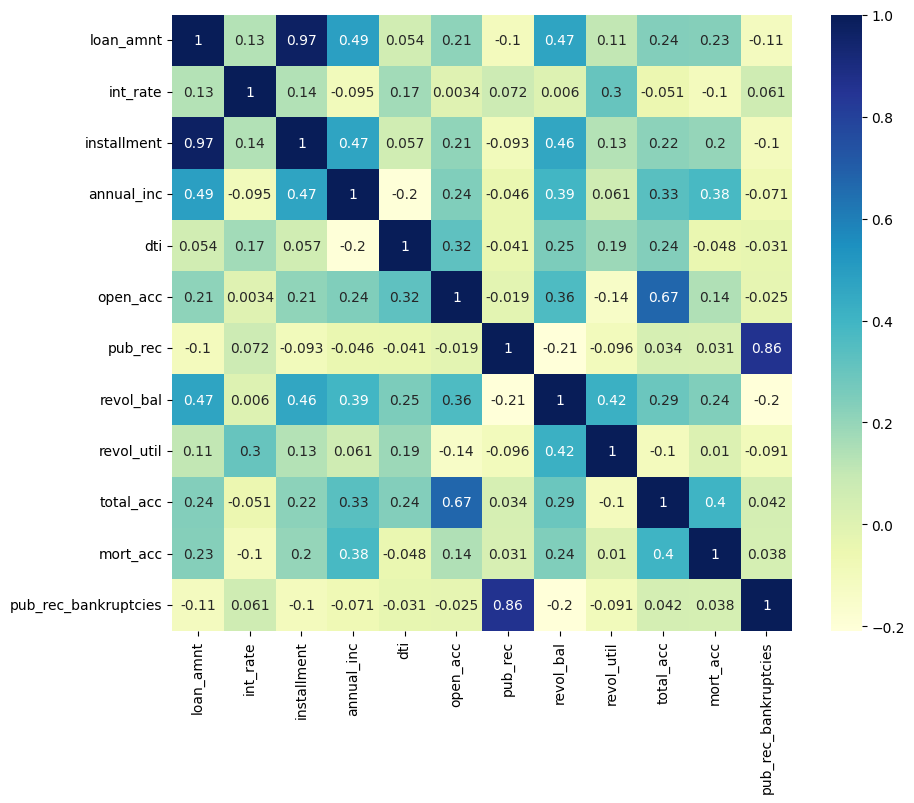

In [149]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_df[num_feat].corr(method="spearman"), annot=True, cmap="YlGnBu")

### Outlier detection

For this purpose, I'll be visualizing Box-plots (univariate & bivariate) of the numerical features in the dataset.

In [62]:
def outliers_viz(features, target="loan_status"):
    n_rows = len(features)
    n_cols = 2

    _, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    for i in range(n_rows):
        # Univariate plot
        sns.boxplot(y=train_df[features[i]], ax=axs[i, 0])

        # Bivariate plot
        sns.boxplot(y=train_df[features[i]], hue=train_df[target], ax=axs[i, 1])
    plt.tight_layout()
    plt.show()

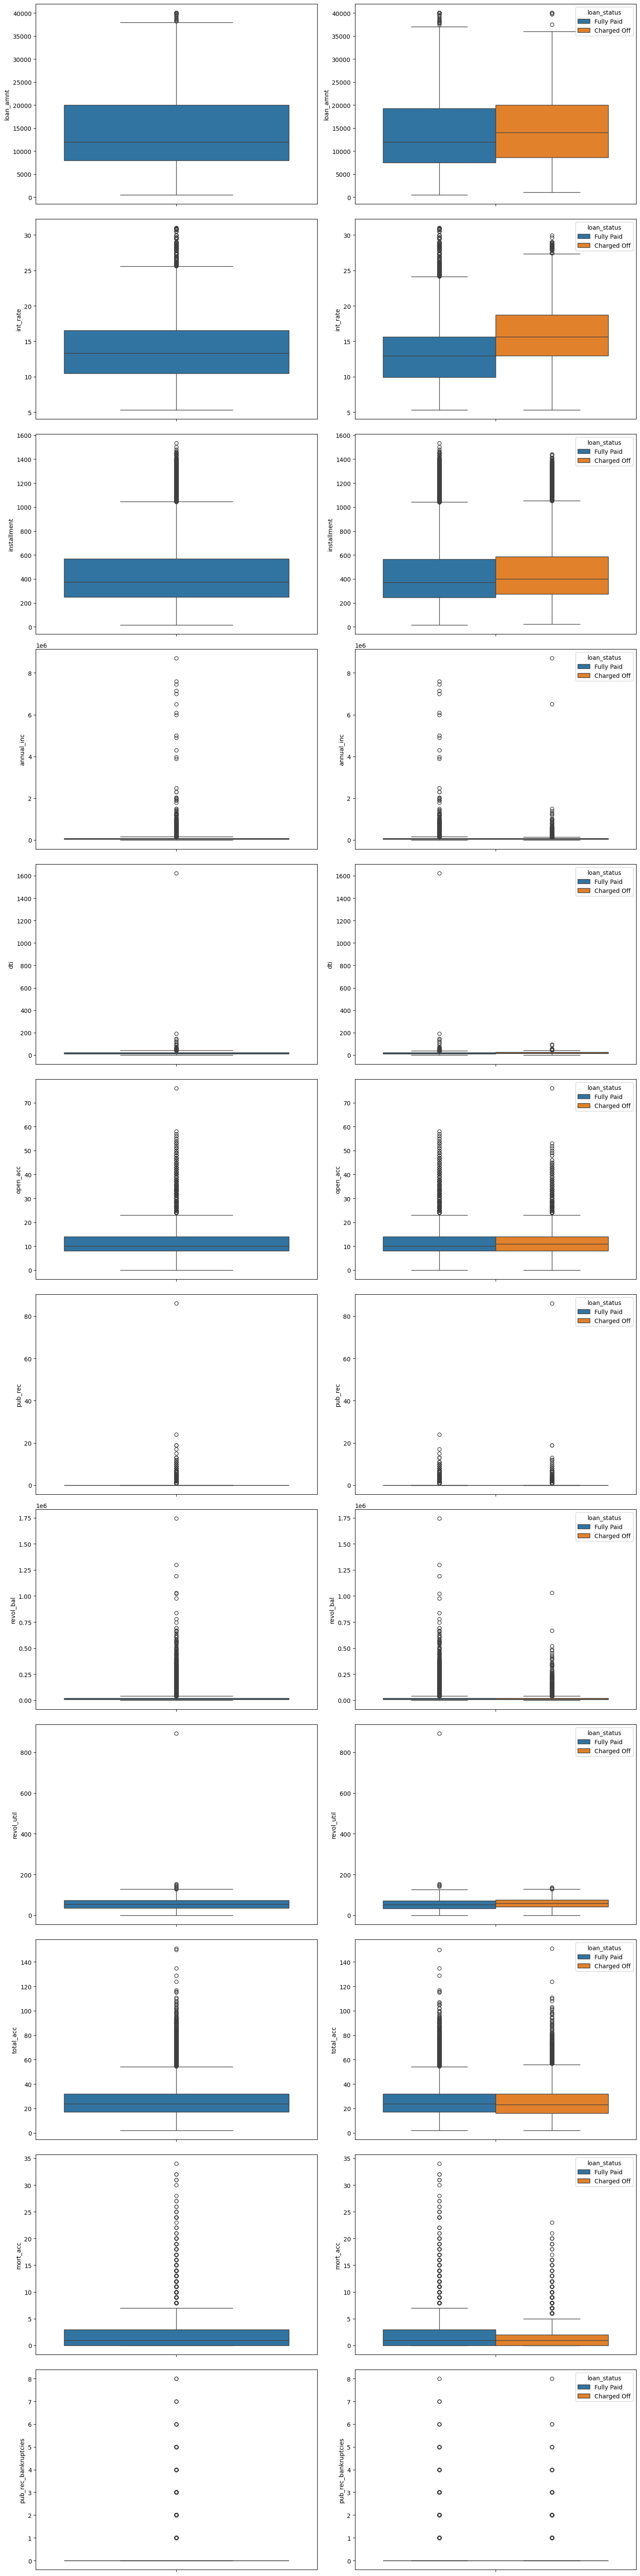

In [63]:
outliers_viz(num_feat)

### Insights from the above analysis

- Univariate:
    - Numerical features:
        * Most of them have skewed distribution, with few features having extreme outliers such as __annual_inc, revol_bal, dti__ etc. We might need to handle outliers first and then apply some transformation (log-normal, Windsorization etc.) to make them approximately normal distribution.
        * Borrowers tend to apply for loan amount in round figures i.e. 5K, 10K, 20K, 25K etc. with $10K being the most commonly borrowed amount.
        * Public derogatory & bankruptcy records are zero for most applicants. They can be converted into a binary feature (Yes or No)
        * __dti, revol_bal, revol_util__ features have very high impossible values. Need to cap them to realistic values
    - Categorical features:
        * 3-year loans is the most preferred option amongst the borrowers.
        * Most loans are assigned B & C grades, especially B3 & B4 subgrades. Loans get riskier in the order A->G & A1->G5.
        * Most loan applicants have 10+ years of experience, while the number of <10 years of experience the number of applicants are almost uniformly distributed.
        * Mortgage & Rent are the major home-ownership type in the applicants.
        * Debt-consolidation & Credit-card repayment are the major purpose of applying for loans.
        * Almost all loan applications are of individual type. 
    - Date-related features:
        * Both issue-date & earliest-credit-line years have a left skewed distribution, but approximately normal. We can create a new feature from these 2 i.e. credit-history = earliest_cr_line - issue_d, indicating credit-history length in years. Will need to check the influence of this feature on loan_status.
- Bivariate:
    - Numerical features:
        * The proportion of defaulter (`Charged Off`) samples increases as the __loan_amnt__ increases. Similar pattern can be observed for __int_rate & installment__
        * In case of __annual_inc__, defaulter proportion is higher for lower income & decreases as income increases.
        * For __dti, revol_bal, revol_util(clearer pattern than others)__ features, the defaulter proportion increase as their values increase.
        * Applicants having any negative record i.e. derogatory or bankruptcy are more likely to default.
    - Categorical features:
        * 5-year loans have higher default rate (~50%) compared to 3-year loans.
        * The default samples proportion increases with grades from A -> G, thus confirming that A-grade loans are the safest & G-grade the riskiest. The same pattern is also observed for sub_grade feature, where the default rate increase for sub-levels from 1 -> 5. __grade & sub_grade__ thus seem like great predictors for the __loan_status__.
        * Default rate is higher for lesser experience applicants i.e. <= 1 year while its lesser amongst higher experienced applicants.
        * Applicants with rented-homes are more likely to default than the ones with mortgaged or owned homes.
        * Default rate doens't vary much across income verification categories. Maybe this feature doens't add any value/information for predicting __loan_status__
        * Debt-consolidation, Moving, Small-business are some of the riskiest categories of __purpose__ feature in terms of default rate
        * Whole-listed-loans are more risky compared to Fractional-listed-loans.
    - Date-related features:
        * Default risk has risen in the recent years of loan issuance i.e. 2013-2015. 
        * Applicants are with shorter credit history (2005 onwards) are more likely to default compared to applicants with longer credit history (before 1990)
- Correlation:
    Assuming, correlation > 0.7 as high, 0.3 <= correlation <= 0.7 as moderate & correlation < 0.3 as weak.
    * __installment__ has the highest correlation with __loan_amnt__, which also makes sense, as monthly installment is a function of: loan-amount, interest-rate & loan-term/duration. 
    * __pub_rec_bankruptcies__ & __pub_rec__ are also highly correlated. We experiment combining them into a single feature, representing if the applicant has any bankruptcy or derogatory records.
    * __total_acc__ & __open_acc__ also show high correlation. There is also small correlation between __total_acc__ & __mort_acc__ features. This indicates that these features are inter-related and can be combined into a single feature using feature engineering.
- Outliers:
    * Since, all the numerical features are right skewed, they all have outliers present on the higher end.
    * For the following features, the median value for default (`Charged Off`) samples is slightly higher than non-default (`Fully Paid`) samples: __loan_amnt, installment, dti, open_acc, revol_util__. This makes sense as applicants might default due to high loan amount => high installment, higher debt, many open credit lines & high revolving utilization of credit balance.
    * For the following features, the median value for default (`Charged Off`) samples is visibly higher than non-default (`Fully Paid`) samples: __int_rate__. This seems correct, as lenders provide loans to riskier applicants at a higher interest-rate due to their higher probability of defaulting.
    * Surprisingly, the median value of `total_acc` for default cases is lower than that of non-default cases. Also, the higher percentile values for `mort_acc` are lower for default cases. This looks correct, as higher # of total credit-lines might mean longer credit-history & higher # of mortgaged credit-lines might mean more financial stability for loan-repayment.


## Hypothesis Testing

We'll use Hypothesis testing to check & validate various hypotheses about the dataset, which might prove useful in the next steps

In [17]:
from scipy.stats import shapiro, levene, mannwhitneyu, ttest_ind, chi2_contingency, spearmanr

### Validate if central tendency of the numerical features significantly differ for loan_status categories

Since, it involves comparing a Numerical feature vs. Categorical feature and there are only 2 categories (hence 2 samples), we can use __t/Mann-Whitney-U__ test to validate our hypothesis. But before that we need:
* To check for normality of sample distributions using __Shapiro-Wilk__ test

    H0: The sample distribution is normally distributed $\newline$
    Ha: The sample distribution is not normally distributed

* To check for equal variablity in samples using __Levene's__ test

    H0: The sample distributions have equal variances $\newline$
    Ha: The sample distributions have unequal variances
    
* If both normal & equal variability:
    * Use t-test
    * Else use the non-parametric Mann-Whitney-U test

    H0: The means of sample distributions are equal i.e. $\mu_1 = \mu_2$ $\newline$
    Ha: The means of sample distributions are unequal i.e. $\mu_1 \ne \mu_2$ or $\mu_1 < \mu_2$ or $\mu_1 > \mu_2$
    

In [16]:
warnings.filterwarnings('ignore')

# Function for hypothesis testing
def validate_num_features(feat_name: str, class_labels: List, alternative=Literal["less", "two-sided", "greater"]):
    print(f"\033[1;33mValidating hypothesis for {feat_name} feature\033[0m")
    
    # Fetch samples
    sample_1 = train_df.loc[train_df["loan_status"]==class_labels[0], feat_name]
    sample_2 = train_df.loc[train_df["loan_status"]==class_labels[1], feat_name]

    # Check for normality
    _, p1_normal = shapiro(sample_1)
    _, p2_normal = shapiro(sample_2)
    are_normal = p1_normal >= 0.05 and p2_normal >= 0.05
    if are_normal: 
        print("Both the samples are normally distributed")
    else:
        print("Either one or Both samples are not normally distributed")
    
    # Check for equal variances
    _, p_variances = levene(sample_1, sample_2)
    equal_variances = p_variances >= 0.05
    if are_normal: 
        print("Both the samples have equal variances")
    else:
        print("Both the samples don't have equal variances")

    # Route to the correct test
    if equal_variances and are_normal:
        # Use t-test
        print(f"Using 2-sample t-test")
        _, p = ttest_ind(sample_1, sample_2, alternative=alternative, nan_policy="omit")
    else:
        # Use Mann-Whitney-U test
        print(f"Using 2-sample Mann-Whitney-U test")
        _, p = mannwhitneyu(sample_1, sample_2, alternative=alternative)

    if p < 0.05:
        sign_mapping = {"less": "<", "two-sided": "!=", "greater": ">"}
        print(f"\033[1;32mThere is significant proof that: mean of {class_labels[0]} {sign_mapping[alternative]} mean of {class_labels[1]}\033[0m")
    else:
        print(f"\033[1;32mThere is no significant difference in means: mean of {class_labels[0]} = mean of {class_labels[1]}")

    print('='*150)

In [84]:
for feat in num_feat:
    if feat != "annual_inc":
        # Check if non-defaulter statistic is less than default statistic
        validate_num_features(feat_name=feat, class_labels=["Fully Paid", "Charged Off"], alternative="less")
    else:
        # Check if non-defaulter statistic is greater than default statistic
        validate_num_features(feat_name=feat, class_labels=["Fully Paid", "Charged Off"], alternative="greater")

Validating hypothesis for loan_amnt feature
Either one or Both samples are not normally distributed
Both the samples don't have equal variances
Using 2-sample Mann-Whitney-U test
There is significant proof that: mean of Fully Paid < mean of Charged Off
Validating hypothesis for int_rate feature
Either one or Both samples are not normally distributed
Both the samples don't have equal variances
Using 2-sample Mann-Whitney-U test
There is significant proof that: mean of Fully Paid < mean of Charged Off
Validating hypothesis for installment feature
Either one or Both samples are not normally distributed
Both the samples don't have equal variances
Using 2-sample Mann-Whitney-U test
There is significant proof that: mean of Fully Paid < mean of Charged Off
Validating hypothesis for annual_inc feature
Either one or Both samples are not normally distributed
Both the samples don't have equal variances
Using 2-sample Mann-Whitney-U test
There is significant proof that: mean of Fully Paid > mean o

### Validate if the categorical features dependent on loan_status 

Since, it involves comparing 2 Categorical features, we can use __Chi-square Independence__ test to validate our hypothesis. But before that we need to check the following assumptions of the test.
- Assumptions:
    * Both the features are categorical (feature of interest vs. `loan_status`) => Satisfied
    * All the observations are independent => Assumed to be satisfied
    * The categories should be mutually exclusive => Satisfied, as no observation belongs to multiple categories
    * The categories should be exhaustive => Satisfied, after removing the null values
    * The sample size should be large enough => Should be satisfied

To perform the test, we need to create a contingency table and pass it to `chi2_contingency`.

- Hypothesis
    * H0: The features are independent
    * Ha: The features are dependent

Validating this hypothesis for following categorical features: __term, grade, sub_grade, emp_length, home_ownership, verification_status, purpose, initial_list_status, application_type__. 

Excluding __emp_title, title, address__ (some categories have count values = 0, violating the test assumptions) & __issue_d, earliest_cr_line__ (as they are date-related features)

In [18]:
def validate_cat_features(feat_name: str, target_feat: str="loan_status"):
    print(f"\033[1;33mValidating hypothesis for {feat_name} feature\033[0m")

    # Create a contingency table
    table = pd.crosstab(index=train_df[feat_name], columns=train_df[target_feat])

    # Chisquare test
    _, p, _, _ = chi2_contingency(table.values)

    if p < 0.05:
        print(f"\033[32m{feat_name} and {target_feat} are dependent on each other\033[0m")
    else:
        print(f"\033[32m{feat_name} and {target_feat} are independent of each other\033[0m")
    print("="*60)

In [85]:
for feat in ["term", "grade", "sub_grade", "emp_length", "home_ownership", "verification_status", "purpose", "initial_list_status", "application_type"]:
    validate_cat_features(feat_name=feat, target_feat="loan_status")

Validating hypothesis for term feature
term and loan_status are dependent on each other
Validating hypothesis for grade feature
grade and loan_status are dependent on each other
Validating hypothesis for sub_grade feature
sub_grade and loan_status are dependent on each other
Validating hypothesis for emp_length feature
emp_length and loan_status are dependent on each other
Validating hypothesis for home_ownership feature
home_ownership and loan_status are dependent on each other
Validating hypothesis for verification_status feature
verification_status and loan_status are dependent on each other
Validating hypothesis for purpose feature
purpose and loan_status are dependent on each other
Validating hypothesis for initial_list_status feature
initial_list_status and loan_status are dependent on each other
Validating hypothesis for application_type feature
application_type and loan_status are dependent on each other


### Validate if loan_status is dependent on year & month of loan approval

To test this, we'll use __Chi-square independence__ test.  `issue_d` satisfies all the test-assumptions, hence going ahead with it.

- Hypothesis:
    * H0: `loan_status` & date-part (year or month) of loan approval are independent of each other $\newline$
    * Ha: `loan_status` & date-part (year or month) of loan approval are dependent on each other

In [86]:
def validate_date_features(feat, date_part: Literal["year", "month"], target_feat: str="loan_status"):
    print(f"\033[1;33mValidating hypothesis for {date_part} of loan approval\033[0m")
    
    # Create a contingency table
    table = pd.crosstab(index=feat, columns=train_df[target_feat])

    # Chisquare test
    _, p, _, _ = chi2_contingency(table.values)

    if p < 0.05:
        print(f"\033[32m{date_part} of loan approval and {target_feat} are dependent on each other\033[0m")
    else:
        print(f"\033[32m{date_part} of loan approval and {target_feat} are independent of each other\033[0m")
    print("="*70)

In [87]:
# Fetch issue year
issue_datetime = pd.to_datetime(train_df["issue_d"], format="mixed")
issue_year, issue_month = issue_datetime.dt.year, issue_datetime.dt.month_name()

validate_date_features(issue_year, date_part="year", target_feat="loan_status")
validate_date_features(issue_month, date_part="month", target_feat="loan_status")

Validating hypothesis for year of loan approval
year of loan approval and loan_status are dependent on each other
Validating hypothesis for month of loan approval
month of loan approval and loan_status are dependent on each other


### Validate if outliers are systemically related to default cases (Charged Off samples)

To test this hypothesis, we need to:
* Identify the outliers in the numerical feature. We can use IQR method to identify outliers
* Create a binary feature, classifying each sample as outlier or not
* Test with this binary feature & `loan_status` using __Chi-square independence__ test

- Hypothesis
    * H0: Feature outliers are independent of loan_status categories
    * Ha: Feature outliers & loan_status categories are dependent on each other

In [45]:
def validate_outliers(feat_name: str, target_feat: str="loan_status"):
    print(f"\033[1;33mValidating hypothesis for {feat_name} feature outliers\033[0m")
    
    # Detect outliers using IQR method
    na_idxs = train_df[feat_name].isna()
    feature_values = train_df.loc[~na_idxs, feat_name]
    q1, q3 = np.percentile(feature_values, q=[25, 75])
    iqr = q3 - q1
    lower_bound, upper_bound = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    feature_outliers = (feature_values < lower_bound) | (feature_values > upper_bound)

    # Create contingency table
    table = pd.crosstab(index=train_df.loc[~na_idxs, target_feat], columns=feature_outliers)

    # Use Chi-square independence test
    _, p, _, _ = chi2_contingency(table.values)

    if p < 0.05:
        print(f"\033[32m{feat_name} outliers & {target_feat} categories are dependent on each other\033[0m")
    else:
        print(f"\033[32m{feat_name} outliers are independent of {target_feat} categories\033[0m")
    print("="*70)

In [105]:
for feat in num_feat:
    validate_outliers(feat_name=feat, target_feat="loan_status")

Validating hypothesis for loan_amnt feature outliers
loan_amnt outliers & loan_status categories are dependent on each other
Validating hypothesis for int_rate feature outliers
int_rate outliers & loan_status categories are dependent on each other
Validating hypothesis for installment feature outliers
installment outliers are independent of loan_status categories
Validating hypothesis for annual_inc feature outliers
annual_inc outliers & loan_status categories are dependent on each other
Validating hypothesis for dti feature outliers
dti outliers & loan_status categories are dependent on each other
Validating hypothesis for open_acc feature outliers
open_acc outliers & loan_status categories are dependent on each other
Validating hypothesis for pub_rec feature outliers
pub_rec outliers & loan_status categories are dependent on each other
Validating hypothesis for revol_bal feature outliers
revol_bal outliers & loan_status categories are dependent on each other
Validating hypothesis for

### Validate if the high correlation between few features are significant

To test this, since both the features being compared will be Numerical, we'll use Correlation test.
We'll be using Spearman correlation coefficient because:
* Almost all numerical features are skewed and Pearson coefficient is sensitive to outliers
* Pearson coefficient assumes linear relationship between features, thus neglecting any other nature of relationship. While Spearman can detect monotonic relationships as well.

We'll also consider the effect-size to rule if the correlation is meaningful or not. This is because for large sample sizes (>100K samples), even the smallest correlation (e.g. 0.05) becomes significant. So, we consider effect-size to rule out meaningless correlation.

- Hypothesis
    * H0: The correlation between the features is insignificant $\rho=0$
    * Ha: There is signifcant correlation between the features $\rho \ne 0$

In [145]:
def validate_correlation(feat_name_1: str, feat_name_2: str):
    print(f"\033[1;034mValidating hypothesis for {feat_name_1} & {feat_name_2} feature\033[0m")

    # Use correlation test
    effect_size, p = spearmanr(train_df[feat_name_1], train_df[feat_name_2], nan_policy="omit")

    if p < 0.05:
        if abs(effect_size) > 0.5:
            print(f"\033[32mThere is significant correlation between {feat_name_1} & {feat_name_2}\033[0m")
        elif abs(effect_size) > 0.3:
            print(f"\033[33mThere is moderate correlation between {feat_name_1} & {feat_name_2}\033[0m")
        else:
            print(f"\033[31mThere is weak to no correlation between {feat_name_1} & {feat_name_2}\033[0m")
    else:
        print(f"\033[32mThe correlation between {feat_name_1} & {feat_name_2} is insignificant\033[0m")
    print("="*70)

In [151]:
validate_correlation("loan_amnt", "annual_inc")
validate_correlation("loan_amnt", "installment")
validate_correlation("loan_amnt", "revol_bal")    

validate_correlation("int_rate", "revol_util")

validate_correlation("installment", "revol_bal")
validate_correlation("installment", "annual_inc")

validate_correlation("annual_inc", "revol_bal")
validate_correlation("annual_inc", "mort_acc")

validate_correlation("dti", "open_acc")

validate_correlation("open_acc", "total_acc")
validate_correlation("open_acc", "revol_bal")

validate_correlation("pub_rec", "pub_rec_bankruptcies")

validate_correlation("revol_bal", "revol_util")

validate_correlation("total_acc", "mort_acc")

Validating hypothesis for loan_amnt & annual_inc feature
There is moderate correlation between loan_amnt & annual_inc
Validating hypothesis for loan_amnt & installment feature
There is significant correlation between loan_amnt & installment
Validating hypothesis for loan_amnt & revol_bal feature
There is moderate correlation between loan_amnt & revol_bal
Validating hypothesis for int_rate & revol_util feature
There is moderate correlation between int_rate & revol_util
Validating hypothesis for installment & revol_bal feature
There is moderate correlation between installment & revol_bal
Validating hypothesis for installment & annual_inc feature
There is moderate correlation between installment & annual_inc
Validating hypothesis for annual_inc & revol_bal feature
There is moderate correlation between annual_inc & revol_bal
Validating hypothesis for annual_inc & mort_acc feature
There is moderate correlation between annual_inc & mort_acc
Validating hypothesis for dti & open_acc feature
Th

### Insights

- Numerical features
    * Following numerical features are more discriminative towards `loan_status` & hence good predictors, as their means for `loan_status` categories are significantly different:
        * Features with significantly higher values for __Charged Off__ applicants: __loan_amnt, int_rate, installment, dti, open_acc, pub_rec__
        * Features with significantly higher values for __Fully Paid__ applicants: __annual_inc__
    * Few features show no significant difference between `loan_status` categories: __revol_bal, revol_util, total_acc, mort_acc, pub_rec_bankruptcies__. These features might need feature engineering
    * The outliers of following features are good indicators of default cases: __loan_amnt, int_rate, annual_inc, dti, open_acc, pub_rec, revol_bal__
    * The following pair of features are highly correlated with each other: __loan_amnt & installment__, __total_acc & open_acc__, __pub_rec & pub_rec_bankruptcies__. Ignoring the moderate correlations & focusing on high correlation features, we need to either drop one of the features or combine them into another meaningful feature as part of feature engineering
- Categorical features
    * As per the hypothesis tests, __loan_status__ target features is dependent on all the categorical features (barring features with high cardinality).
- Date features
    * The year & month of loan approval also has a significant relation with the target feature __loan_status__